In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\admin\Desktop\dataset\car_data.csv")
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [3]:
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [4]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [5]:
df.shape

(11914, 16)

In [6]:
print(df['Make'].value_counts()) #VIEWING CAR COMPONENTS WITH THEIR CARS NUMBER

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyker    

In [7]:
new_df=df[df['Make']=='Volkswagen'] #in this data set we only take 'volkswagen' cars

In [8]:
print(new_df.shape)

(809, 16)


In [9]:
print(new_df.isnull().sum())

Make                   0
Model                  0
Year                   0
Engine Fuel Type       0
Engine HP              0
Engine Cylinders       4
Transmission Type      0
Driven_Wheels          0
Number of Doors        0
Market Category      224
Vehicle Size           0
Vehicle Style          0
highway MPG            0
city mpg               0
Popularity             0
MSRP                   0
dtype: int64


In [10]:
new_df=new_df.dropna()

In [11]:
new_df.shape

(581, 16)

In [12]:
new_df.isnull().sum()

In [13]:
new_df.sample(5)

In [14]:
new_df=new_df[['Engine HP','MSRP']]  #WE ONLY TAKE ENGINE HP AND MSRP COLUMN

In [15]:
#new_df.head()

In [16]:
new_df.sample(5)

,Engine HP,MSRP
7543,420.0,94600
2405,200.0,34655
5395,220.0,32730
5426,150.0,27995
5612,200.0,27845


In [17]:
print(new_df['Engine HP'].dtypes)
print(new_df['MSRP'].dtypes)                     #to check datatypes

float64
int64


In [18]:
new_df['MSRP']=new_df['MSRP'].astype(dtype='float64')                   #converting float datatype

In [19]:
new_df.sample(5)

,Engine HP,MSRP
10545,280.0,59745.0
10419,200.0,26865.0
7223,150.0,20390.0
10410,200.0,26255.0
6073,140.0,28695.0


In [20]:
x=np.array(new_df[['Engine HP']])
y=np.array(new_df[['MSRP']])
print(x.shape)
print(y.shape)

(581, 1)
(581, 1)


In [21]:
#x

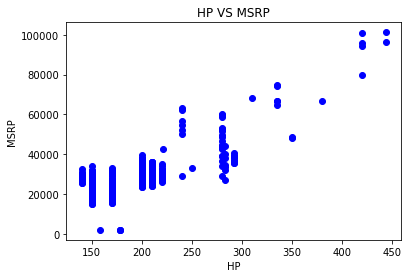

In [22]:
plt.scatter(x,y,color="blue")
plt.title('HP VS MSRP')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=15)
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((464, 1), (117, 1), (464, 1), (117, 1))

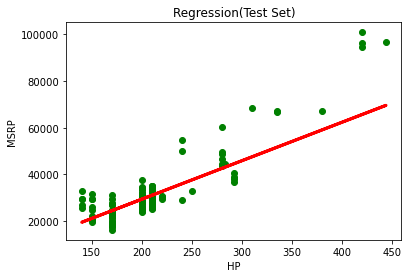

In [25]:
plt.scatter(x_test,y_test,color='green')
plt.plot(x_train,regressor.predict(x_train),color="red",linewidth=3)
plt.title('Regression(Test Set)')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

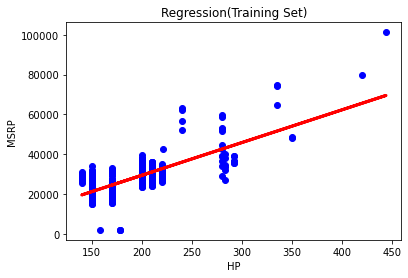

In [26]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,regressor.predict(x_train),color="red",linewidth=3)
plt.title('Regression(Training Set)')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

In [27]:
y_pred=regressor.predict(x_test)
print('R2 score: %.2f' % r2_score(y_test,y_pred))

R2 score: 0.73


In [28]:
print('Mean Error :', mean_squared_error(y_test,y_pred))

Mean Error : 65565468.842153266


In [29]:
def car_price(hp):
    result= regressor.predict(np.array(hp).reshape(1,-1))
    return(result[0,0])

In [30]:
car_hp= int(input('Enter Volkswagen cars Horse power :'))
print('This Volkswagen price will be :', int(car_price(car_hp))*60,'rs')

Enter Volkswagen cars Horse power :60
This Volkswagen price will be : 384000 rs
